In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns

import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.patches import Patch

from pycirclize import Circos

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

/home/yyasumizu/anaconda3/envs/scanpy1.8.1_cd4t/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# vis NMF res

In [6]:
df = pd.read_csv('../output/metaanalysis/230122_CD4T_NMF_queryL2_glm_withproj.csv')
df.head()

,var,Estimate,Std. Error,t value,Pr(>|t|),cell,component,padj
0,(Intercept),0.750978,0.000247,3038.443946,0.000000e+00,Tnaive,NMF_0,0.000000e+00
1,diseaseAD,-0.003957,0.000942,-4.199530,2.674948e-05,Tnaive,NMF_0,1.147285e-01
2,diseaseBD,-0.005359,0.001177,-4.552448,5.303186e-06,Tnaive,NMF_0,2.360979e-02
3,diseaseCD,0.025480,0.001817,14.019142,1.202996e-44,Tnaive,NMF_0,7.974657e-41
4,diseaseCeliac,-0.005787,0.001915,-3.022630,2.505953e-03,Tnaive,NMF_0,1.000000e+00


In [84]:
list_var = ['diseaseAD', 'diseaseBD', 'diseaseCD',
       'diseaseCeliac', 'diseaseCovid', 'diseaseFlu', 'diseaseKawasaki',
       'diseaseMG', 'diseaseMS', 'diseaseNeurosarcoidosis',
       'diseaseParkinsonDisease', 'diseasePPP', 'diseasePsoriasis',
       'diseasepSS', 'diseaseRA', 'diseaseSarcoidosis', 'diseaseSLE',
       'diseaseT1D', 'diseaseTuberculosis', 'diseaseUC', 'age',
       'sexfemale']

dict_index = {'NMF_0' : 'NMF0 Cytotoxic-F', 
              'NMF_1' : "NMF1 Treg-F", 
              'NMF_2' : "NMF2 Th17-F", 
              'NMF_3' : "NMF3 Naive-F", 
              'NMF_4' : "NMF4 Act-F", 
              'NMF_5' : "NMF5 TregEff/Th2-F", 
              'NMF_6' : "NMF6 Tfh-F", 
              'NMF_7' : "NMF7 IFN-F", 
              'NMF_8' : "NMF8 Cent.Mem.-F", 
              'NMF_9' : "NMF9 Thy.Emi.-F", 
              'NMF_10' : "NMF10 Tissue-F", 
              'NMF_11' : "NMF11 Th1-F"}

list_color_index = ['diseaseSLE',
 'age',
 'diseaseCovid',
 'sexfemale',
 'diseaseMS',
 'diseaseNeurosarcoidosis',
 'diseaseRA',
 'diseaseMG',
 'diseaseParkinsonDisease',
 'diseasepSS',
 'diseaseKawasaki',
 'diseasePsoriasis',
 'diseaseAD',
 'diseaseTuberculosis',
 'diseaseCD',
 'diseaseT1D',
 'diseaseFlu',
 'diseasePPP',
 'diseaseCeliac',
 'diseaseSarcoidosis',
 'diseaseUC',
 'diseaseBD']

cp = list(sns.color_palette("tab10", 10)) + \
[list(sns.color_palette("tab20b", 20))[2*i] for i in range(10)] + \
[list(sns.color_palette("tab20", 20))[2*i+1] for i in range(2)]

dict_color = {x: cp[list_color_index.index(x)] for x in list_color_index}

In [76]:
len(list_color_index)

22

In [85]:
df = df[df['var'].isin(list_var)]

In [86]:
df.shape

(4716, 8)

In [114]:
df_sel = df.nlargest(100, 't value')
df_sel.head()

,var,Estimate,Std. Error,t value,Pr(>|t|),cell,component,padj
346,diseaseSLE,0.047443,0.000222,213.892479,0.0,Tnaive,NMF_7,0.0
397,age,0.027464,0.000193,142.558069,0.0,Tnaive,NMF_8,0.0
334,diseaseCovid,0.047840,0.000394,121.361216,0.0,Tnaive,NMF_7,0.0
2602,diseaseSLE,0.060101,0.000528,113.809772,0.0,TcmTh0,NMF_7,0.0
209,age,0.013236,0.000117,113.185283,0.0,Tnaive,NMF_4,0.0


In [115]:
list(df.sort_values(by='t value', ascending=False)['var'].drop_duplicates())

['diseaseSLE',
 'age',
 'diseaseCovid',
 'sexfemale',
 'diseaseMS',
 'diseaseNeurosarcoidosis',
 'diseaseRA',
 'diseaseMG',
 'diseaseParkinsonDisease',
 'diseasepSS',
 'diseaseKawasaki',
 'diseasePsoriasis',
 'diseaseAD',
 'diseaseTuberculosis',
 'diseaseCD',
 'diseaseT1D',
 'diseaseFlu',
 'diseasePPP',
 'diseaseCeliac',
 'diseaseSarcoidosis',
 'diseaseUC',
 'diseaseBD']

In [116]:
df_sel.groupby(by='cell')['t value'].sum().sort_values().to_dict()

{'TemTh1': 32.303028563847775,
 'TemTh117': 51.03953568601067,
 'TemTph': 58.49073456475425,
 'TregNaive': 81.70358844083772,
 'TregEff': 82.45916939991179,
 'TregAct': 84.10667426519836,
 'TcmTh2': 100.17826979544617,
 'TnaiveSOX4': 157.90099873518164,
 'TnaiveMX1': 167.48996954623607,
 'TcmTfh': 179.4108851487705,
 'TemTh1pre': 286.9629869479078,
 'TcmTh17': 308.67623833756664,
 'TemraTh1': 321.9622278505998,
 'TcmTh0': 510.91329123206486,
 'TnaiveAct': 652.6820544192451,
 'Tnaive': 1544.3072749571334}

In [117]:
df_sel.groupby(by='component')['t value'].sum().sort_values().to_dict()

{'NMF_1': 26.434478430741144,
 'NMF_11': 27.96479144256901,
 'NMF_5': 84.3460435294877,
 'NMF_9': 102.04364709319458,
 'NMF_6': 104.54356630993438,
 'NMF_2': 111.81020063775637,
 'NMF_0': 172.51978662487835,
 'NMF_10': 534.8285260032515,
 'NMF_8': 756.1789176911772,
 'NMF_4': 833.1496291815707,
 'NMF_7': 1866.7673409461515}

In [118]:
sns.color_palette("tab10", len(df_sel['var'].unique()))

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725)]

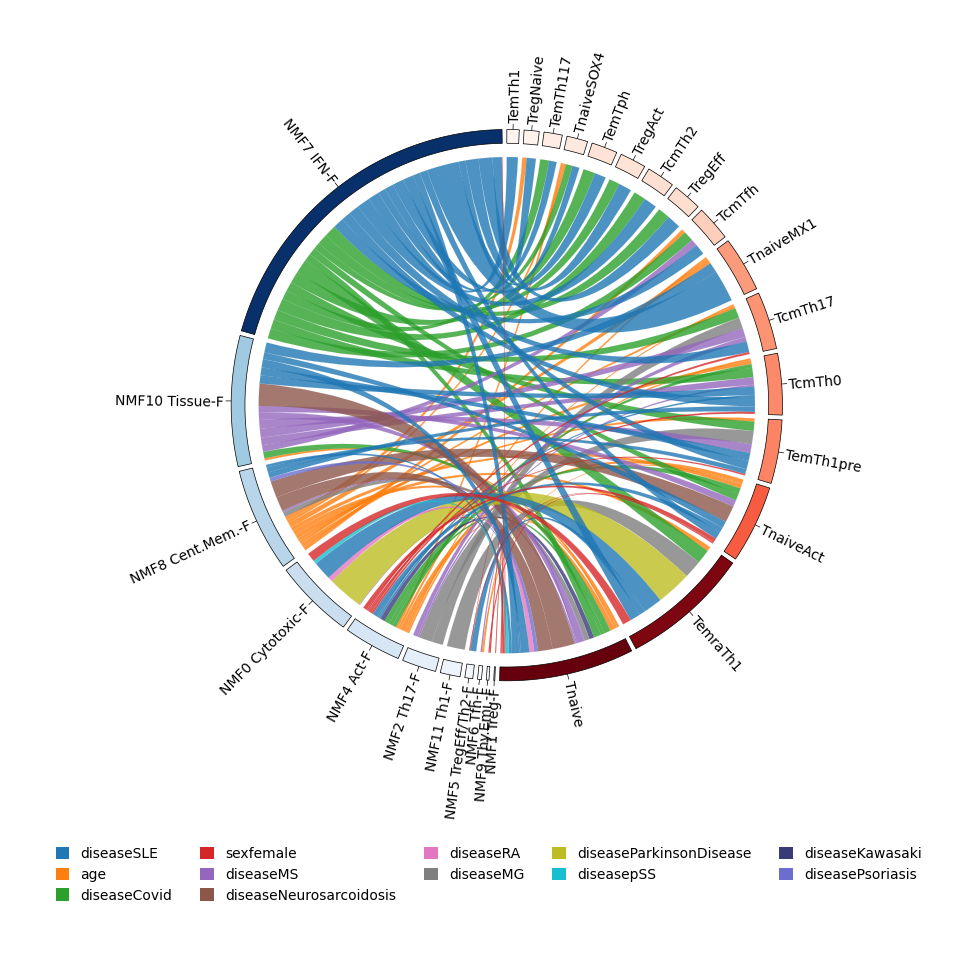

In [119]:
cmap_cell = cm.Reds
norm_cell = Normalize(vmin=df_sel.groupby(by='cell')['Estimate'].sum().min(), vmax=df_sel.groupby(by='cell')['Estimate'].sum().max())

cmap_nmf = cm.Blues
norm_nmf = Normalize(vmin=df_sel.groupby(by='component')['Estimate'].sum().min(), vmax=df_sel.groupby(by='component')['Estimate'].sum().max())

# # cp = sns.color_palette("bright", len(df_sel['var'].unique()))
# # cp = sns.color_palette("tab20", len(df_sel['var'].unique()))
# cp = list(sns.color_palette("tab10", 10)) + \
# [list(sns.color_palette("tab20b", 20))[2*i] for i in range(len(df_sel['var'].unique())-10)]

sectors = df_sel.groupby(by='cell')['Estimate'].sum().sort_values().to_dict()
sectors.update(df_sel.groupby(by='component')['Estimate'].sum().sort_values().to_dict())

sec_pos = {k:0 for k,v in sectors.items()}

circos = Circos(sectors, space=1)
for sector in circos.sectors:
    if sector.name.startswith('NMF'):
        color = cmap_nmf(norm_nmf(sector.size))  
        name = dict_index[sector.name]
    else:
        color = cmap_cell(norm_cell(sector.size))
        name = sector.name
    # Outer Track
    outer_track = sector.add_track((95, 100))
    outer_track.axis(fc=color)
    
    outer_track.xticks([sector.size/2], [name], label_orientation="vertical", label_size=10)
    
for pos,row in df_sel.sort_values(by=['var', 'cell', 'component']).iterrows():
    circos.link((row['component'], sec_pos[row['component']], sec_pos[row['component']]+row['Estimate']-0.001), 
                (row['cell'], sec_pos[row['cell']]+row['Estimate']-0.001, sec_pos[row['cell']]), 
                color=dict_color[row['var']], r1=90, r2=90, alpha=0.8)
    sec_pos[row['cell']] += row['Estimate']
    sec_pos[row['component']] += row['Estimate']

# Add legend
handles = [Patch(color=dict_color[x], label=x) for x in list(df_sel['var'].unique())]

fig = circos.plotfig()
_ = fig.legend(handles=handles, bbox_to_anchor=(0.5, -0.1), loc='lower center', ncol=5, fontsize=10)


In [120]:
df_sel['var']

346       diseaseSLE
397              age
334     diseaseCovid
2602      diseaseSLE
209              age
            ...     
3815       diseaseMS
5742       sexfemale
2461      diseaseSLE
7558    diseaseCovid
821        sexfemale
Name: var, Length: 100, dtype: object

In [121]:
fig.savefig('../output/metaanalysis/230223_NMF_top100.pdf')

In [122]:
df_sel = df.nsmallest(100, 't value')
df_sel.head()

,var,Estimate,Std. Error,t value,Pr(>|t|),cell,component,padj
444,age,-0.014929,0.000097,-154.314150,0.0,Tnaive,NMF_9,0.0
158,diseaseSLE,-0.032245,0.000346,-93.197374,0.0,Tnaive,NMF_3,0.0
1008,age,-0.018745,0.000203,-92.304727,0.0,TnaiveAct,NMF_9,0.0
441,diseaseT1D,-0.027662,0.000324,-85.395474,0.0,Tnaive,NMF_9,0.0
2136,age,-0.058896,0.000806,-73.112980,0.0,TnaiveSOX4,NMF_9,0.0


In [123]:
df_sel['Estimate'] = df_sel['Estimate'] * -1

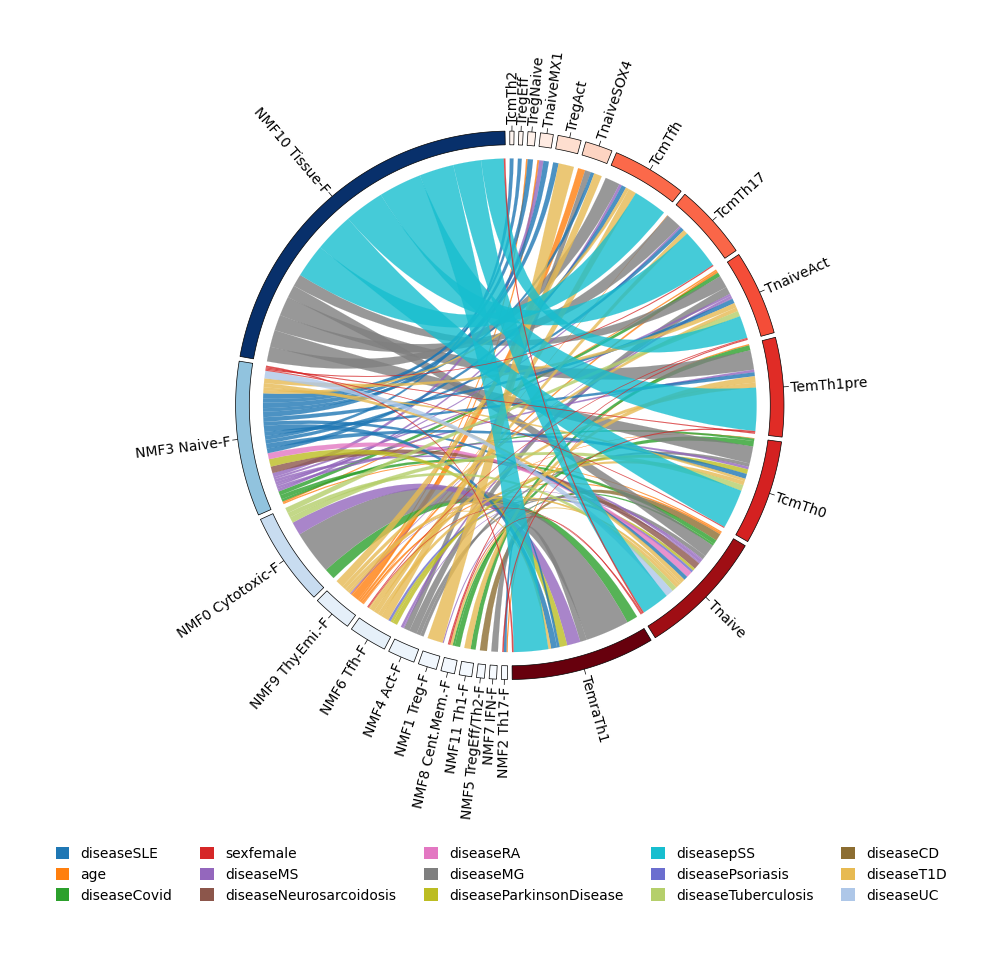

In [124]:
cmap_cell = cm.Reds
norm_cell = Normalize(vmin=df_sel.groupby(by='cell')['Estimate'].sum().min(), vmax=df_sel.groupby(by='cell')['Estimate'].sum().max())

cmap_nmf = cm.Blues
norm_nmf = Normalize(vmin=df_sel.groupby(by='component')['Estimate'].sum().min(), vmax=df_sel.groupby(by='component')['Estimate'].sum().max())

# # cp = sns.color_palette("bright", len(df_sel['var'].unique()))
# # cp = sns.color_palette("tab20", len(df_sel['var'].unique()))
# cp = list(sns.color_palette("tab10", 10)) + \
# [list(sns.color_palette("tab20b", 20))[2*i] for i in range(len(df_sel['var'].unique())-10)]

sectors = df_sel.groupby(by='cell')['Estimate'].sum().sort_values().to_dict()
sectors.update(df_sel.groupby(by='component')['Estimate'].sum().sort_values().to_dict())

sec_pos = {k:0 for k,v in sectors.items()}

circos = Circos(sectors, space=1)
for sector in circos.sectors:
    if sector.name.startswith('NMF'):
        color = cmap_nmf(norm_nmf(sector.size))  
        name = dict_index[sector.name]
    else:
        color = cmap_cell(norm_cell(sector.size))
        name = sector.name
    # Outer Track
    outer_track = sector.add_track((95, 100))
    outer_track.axis(fc=color)
    
    outer_track.xticks([sector.size/2], [name], label_orientation="vertical", label_size=10)
    
for pos,row in df_sel.sort_values(by=['var', 'cell', 'component']).iterrows():
    circos.link((row['component'], sec_pos[row['component']], sec_pos[row['component']]+row['Estimate']-0.001), 
                (row['cell'], sec_pos[row['cell']]+row['Estimate']-0.001, sec_pos[row['cell']]), 
                color=dict_color[row['var']], r1=90, r2=90, alpha=0.8)
    sec_pos[row['cell']] += row['Estimate']
    sec_pos[row['component']] += row['Estimate']

# Add legend
handles = [Patch(color=dict_color[x], label=x) for x in [x for x in list_color_index if x in list(df_sel['var'])]]

fig = circos.plotfig()
_ = fig.legend(handles=handles, bbox_to_anchor=(0.5, -0.1), loc='lower center', ncol=5, fontsize=10)


In [125]:
fig.savefig('../output/metaanalysis/230223_NMF_bottom100.pdf')